# Medical Data Visualizer

This project was made as [Data Analysis project for freecodecamp](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer) The dataset values were collected during medical examinations.

#### Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [1]:
#importing needed libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import data
data=pd.read_csv("medical_examination.csv", sep=";")


In [2]:
#copying data for further changes
df=data.copy()
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an overweight column to the data (using BMI)
- BMI = dividing their weight in kilograms by the square of their height in meters.
- if BMI > 25 return 1 else 0 

In [3]:
df["overweight"]=(df["weight"]/((df["height"]/100)**2)>25).astype(int)


 Normalize data by making 0 always good and 1 always bad. 
- If the value of 'cholesterol' or 'gluc' = 1 return value 0. 
- If value > 1 return value=1.

In [4]:
#gluc 
df['gluc'] = df['gluc'].replace(to_replace=1, value=0)
df['gluc'] = df['gluc'].replace(to_replace=(2,3), value=1)

#cholesterol
df['cholesterol'] = df['cholesterol'].replace(to_replace=1, value=0)
df['cholesterol'] = df['cholesterol'].replace(to_replace=(2,3), value=1)


Convert the data into long format and create a chart that shows the value counts of the categorical features.

In [5]:
#making new dataframe only for needed data from wide to long format
plot1_df = pd.melt(
    df, 
    id_vars='cardio', 
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)

#grouping dataset by these three columns and save size of groups to new column
plot1_df['size'] = plot1_df.groupby(['cardio', 'variable', 'value'])['value'].transform('size')

#delete duplicates 
plot1_df.drop_duplicates(subset=['variable', 'size'], keep='first', inplace=True)

#reset index 
plot1_df = plot1_df.reset_index(drop=True)
plot1_df

,cardio,variable,value,size
0,0,cholesterol,0,29330
1,1,cholesterol,1,11924
2,1,cholesterol,0,23055
3,0,cholesterol,1,5691
4,0,gluc,0,30894
5,1,gluc,0,28585
6,0,gluc,1,4127
7,1,gluc,1,6394
8,0,smoke,0,31781
9,1,smoke,0,32050


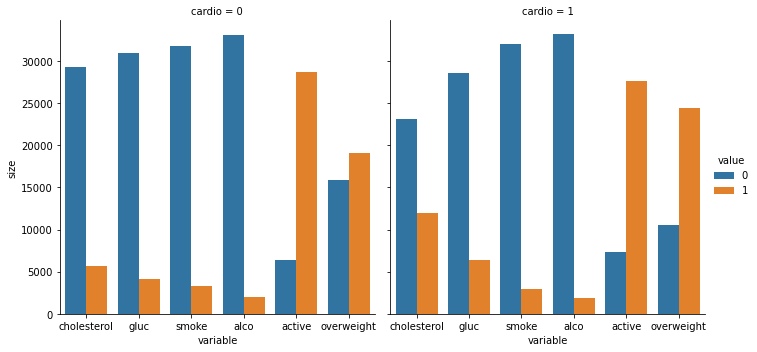

In [6]:
#presenting plot

sns.catplot(x='variable',y="size",hue="value",col="cardio",kind="bar",data=plot1_df)

## Cleaning the data. Filtering out the following patient segments that represent incorrect data:
1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
2. height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
3. height is more than the 97.5th percentile
4. weight is less than the 2.5th percentile
5. weight is more than the 97.5th percentile

In [7]:
#copying to make changes
new_df = df.copy()


# diastolic pressure('ap_lo') is higher than systolic('ap_hi')
new_df = new_df.drop(new_df.loc[(new_df['ap_lo'] > new_df['ap_hi'])].index)


# height is less than the 2.5th percentile
new_df = new_df.drop(new_df.loc[(new_df['height'] < new_df['height'].quantile(0.025))].index)


# height is more than the 97.5th percentile
new_df = new_df.drop(new_df.loc[(df['height'] > df['height'].quantile(0.975))].index)


# weight is less than the 2.5th percentile
new_df = new_df.drop(new_df.loc[(df['weight'] < df['weight'].quantile(0.025))].index)

# weight is more than the 97.5th percentile
new_df = new_df.drop(new_df.loc[(df['weight'] > df['weight'].quantile(0.975))].index)

false_data=df.shape[0]-new_df.shape[0]
print(f"eliminated {false_data} of false information.")


eliminated 6741 of false information.


### presenting heatmap with cleaned data

<AxesSubplot:>

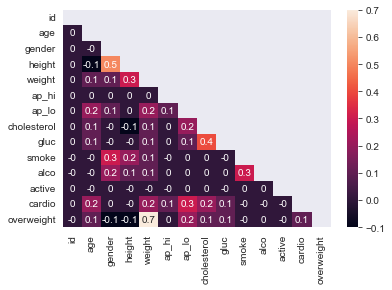

In [8]:
#correlation matrix
corr=round(new_df.corr().astype(float),1)
mask0=np.triu(np.ones_like(corr))

#showing heatmap
sns.set_style('darkgrid')
sns.heatmap(corr,annot=True,mask=mask0)